## 넷플릭스 분석

#### 데이터 불러오기

In [28]:
import pandas as pd
import os

path_credit=os.getcwd()+'/archive/credits.csv'
path_title=os.getcwd()+'/archive/titles.csv'

credit=pd.read_csv(path_credit)
title=pd.read_csv(path_title)

In [29]:
credit.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


id : 영화 각 해당 번호
name: 배우 이름 
character: 배우가 연기한 캐릭터

In [30]:
credit.shape

(77801, 5)

In [31]:
title.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [32]:
title.shape

(5850, 15)

#### 결측치 확인

In [33]:
import numpy as np

In [34]:
title.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [35]:
title.shape

(5850, 15)

상관 관계 

In [36]:
title.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073
runtime,-0.173551,1.000000,-0.139642,-0.148068,0.139760,0.002545,-0.277454
seasons,-0.504407,-0.139642,1.000000,0.106806,0.206079,0.168051,0.044023
imdb_score,-0.129380,-0.148068,0.106806,1.000000,0.190661,0.017675,0.570754
imdb_votes,-0.208815,0.139760,0.206079,0.190661,1.000000,0.209763,0.112960
tmdb_popularity,0.043244,0.002545,0.168051,0.017675,0.209763,1.000000,0.071894
tmdb_score,0.032073,-0.277454,0.044023,0.570754,0.112960,0.071894,1.000000


##### imdb_score, imdb_votes, tmdb_popularity, tmdb_score 다 값 없을 경우 제거

In [37]:
nan_votes=title[np.isnan(title['imdb_votes'])].index
nan_imscore=title[np.isnan(title['imdb_score'])].index
nan_tmscore=title[np.isnan(title['tmdb_score'])].index
nan_tmpop=title[np.isnan(title['tmdb_popularity'])].index

In [38]:
nan_votes

Int64Index([   0,   75,  145,  177,  180,  196,  198,  212,  214,  249,
            ...
            5790, 5791, 5792, 5799, 5802, 5810, 5833, 5840, 5844, 5848],
           dtype='int64', length=498)

In [39]:
a=list(set(nan_votes).intersection(nan_imscore))
a

[0,
 4110,
 4111,
 4124,
 4125,
 4126,
 4127,
 4132,
 4133,
 2088,
 2105,
 4160,
 4163,
 4168,
 75,
 4174,
 4196,
 4223,
 4226,
 4234,
 2189,
 145,
 4249,
 4251,
 4258,
 4261,
 177,
 4275,
 180,
 2228,
 4277,
 4279,
 4282,
 4291,
 196,
 198,
 4298,
 4304,
 212,
 214,
 2262,
 4312,
 4317,
 4322,
 4330,
 2287,
 249,
 4351,
 4354,
 4357,
 4358,
 4360,
 265,
 4361,
 4362,
 2319,
 272,
 4373,
 4379,
 2339,
 2341,
 4392,
 4399,
 4406,
 4418,
 4428,
 4435,
 4436,
 4438,
 4441,
 4446,
 351,
 4449,
 357,
 4454,
 360,
 4456,
 362,
 4457,
 4466,
 2426,
 2428,
 4478,
 2431,
 4480,
 2433,
 4481,
 387,
 4486,
 4487,
 4488,
 2451,
 4499,
 4500,
 4503,
 4507,
 4511,
 4513,
 4517,
 4531,
 2485,
 4536,
 4538,
 4547,
 4550,
 4552,
 460,
 4556,
 4557,
 4558,
 471,
 2524,
 4572,
 4579,
 4581,
 4582,
 4589,
 4591,
 4592,
 4593,
 4594,
 4599,
 4604,
 4606,
 4610,
 515,
 4622,
 4627,
 533,
 4630,
 539,
 4637,
 4641,
 4642,
 547,
 4644,
 549,
 4647,
 552,
 2600,
 554,
 4649,
 4652,
 4653,
 2607,
 4656,
 4657,


In [40]:
b=list(set(a).intersection(nan_tmscore))
b

[0,
 1035,
 4622,
 5657,
 1061,
 4647,
 2600,
 1583,
 1072,
 4656,
 4657,
 4658,
 1588,
 5682,
 5686,
 4669,
 1088,
 577,
 4675,
 4682,
 1108,
 1111,
 1113,
 1118,
 609,
 5729,
 1636,
 1641,
 624,
 627,
 2677,
 5749,
 632,
 634,
 637,
 1666,
 1668,
 5776,
 5278,
 1699,
 3751,
 1704,
 5802,
 5810,
 5301,
 2754,
 4803,
 5833,
 4304,
 5844,
 3819,
 2287,
 5371,
 4357,
 4358,
 4360,
 5390,
 808,
 822,
 827,
 4957,
 4446,
 2919,
 360,
 5483,
 2930,
 2428,
 2941,
 2433,
 5507,
 4487,
 2952,
 5007,
 4500,
 2965,
 4513,
 2983,
 2485,
 4536,
 4538,
 5562,
 3021,
 1504,
 3040,
 4589,
 4591,
 4594,
 4604]

In [86]:
c=list(set(b).intersection(nan_tmpop))
c.sort()
c

[577,
 627,
 808,
 1072,
 1088,
 1588,
 1668,
 1704,
 2754,
 2930,
 2941,
 3819,
 5483,
 5507,
 5810,
 5844]

In [87]:
len(c)

16

In [88]:
title=title.drop(index=c) #삭제

KeyError: '[ 577  627  808 1072 1088 1588 1668 1704 2754 2930 2941 3819 5483 5507\n 5810 5844] not found in axis'

In [44]:
title.shape

(5834, 15)

#### seasons 가 tmdb_popularity와 연관 높아 지우지 않고 nan값은 0으로 보간

In [45]:
title['seasons']=title['seasons'].fillna(0)

In [46]:
title['seasons']

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5845    0.0
5846    0.0
5847    0.0
5848    0.0
5849    1.0
Name: seasons, Length: 5834, dtype: float64

In [47]:
title.isna().sum()

id                         0
title                      0
type                       0
description               15
release_year               0
age_certification       2608
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  399
imdb_score               466
imdb_votes               482
tmdb_popularity           75
tmdb_score               295
dtype: int64

##### imdb_score, tmdb_score  둘 중 하나가 값을 가지고 있는 경우 그 값으로 채워주기

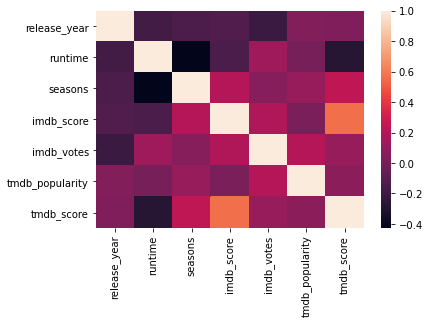

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=title.corr()
sns.heatmap(corr)
plt.show()  

imdb_score, tmdb_score 연관성 높음

In [49]:
nan_imscore=list(nan_imscore)
nan_tmscore=list(nan_tmscore)

score=nan_imscore+nan_tmscore
score.sort()

not_duplicated=[]
duplicated=[]

#중복원소 추출
for i in score:
    if i not in not_duplicated:
        not_duplicated.append(i)
    elif i in not_duplicated:
        duplicated.append(i)

#score list에서 하나만 있는 값 추출
for i in not_duplicated:
    if i in duplicated:
        not_duplicated.remove(i)
        
not_duplicated.sort()

#duplicated -> imdb tmdb 둘다 없는 
print(duplicated)
print(not_duplicated)
#not duplicated -> imdb tmdb 하나만 있는
len(not_duplicated)

[0, 360, 577, 609, 624, 627, 632, 634, 637, 808, 822, 827, 1035, 1061, 1072, 1088, 1108, 1111, 1113, 1118, 1504, 1583, 1588, 1636, 1641, 1666, 1668, 1699, 1704, 2287, 2428, 2433, 2485, 2600, 2677, 2754, 2919, 2930, 2941, 2952, 2965, 2983, 3021, 3040, 3751, 3819, 4304, 4357, 4358, 4360, 4446, 4487, 4500, 4513, 4536, 4538, 4589, 4591, 4594, 4604, 4622, 4647, 4656, 4657, 4658, 4669, 4675, 4682, 4803, 4957, 5007, 5278, 5301, 5371, 5390, 5483, 5507, 5562, 5657, 5682, 5686, 5729, 5749, 5776, 5802, 5810, 5833, 5844]
[56, 75, 79, 83, 84, 85, 145, 177, 180, 196, 198, 212, 214, 249, 265, 272, 351, 357, 362, 387, 411, 455, 460, 466, 469, 471, 514, 515, 518, 533, 535, 539, 547, 549, 552, 554, 555, 556, 557, 564, 565, 574, 576, 592, 596, 618, 619, 622, 627, 629, 630, 633, 635, 636, 685, 693, 698, 723, 724, 725, 746, 762, 763, 765, 769, 804, 806, 810, 812, 823, 825, 884, 921, 923, 952, 961, 966, 976, 1014, 1015, 1032, 1048, 1049, 1059, 1062, 1067, 1068, 1073, 1079, 1092, 1096, 1104, 1111, 1114, 1115

625

In [65]:
for i in not_duplicated:
    if np.isnan(title['imdb_score'][i])=='True':
        a=1

KeyError: 627

In [25]:
type(title['tmdb_score'][5846])

numpy.float64

In [ ]:
print(title['imdb_score'][5846])
print(title['tmdb_score'][5846])

In [ ]:
title.isna().sum()

#### 티비 쇼와 영화 비중 구분 및 시각화

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

종류 확인

In [67]:
type=title['type']
list(set(type))

['MOVIE', 'SHOW']

결측치 확인

In [68]:
type.isna().sum()

0

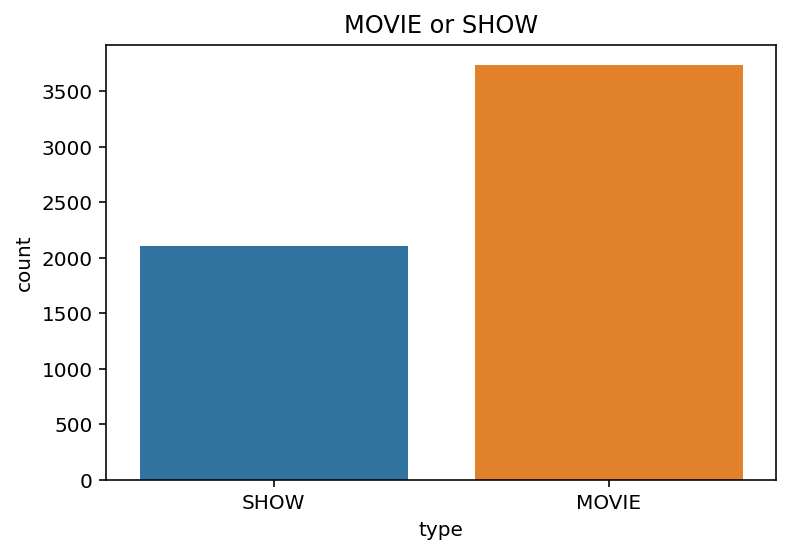

In [69]:
sns.countplot(data=title, x="type")
plt.title("MOVIE or SHOW")
plt.show()

영화가 1500개 가량 더 많음 

#### 년도별 영화 출판 수

In [70]:
year=title['release_year']
year

0       1945
1       1976
2       1972
3       1975
4       1967
        ... 
5845    2021
5846    2021
5847    2021
5848    2021
5849    2021
Name: release_year, Length: 5834, dtype: int64

In [71]:
year.isna().sum()

0

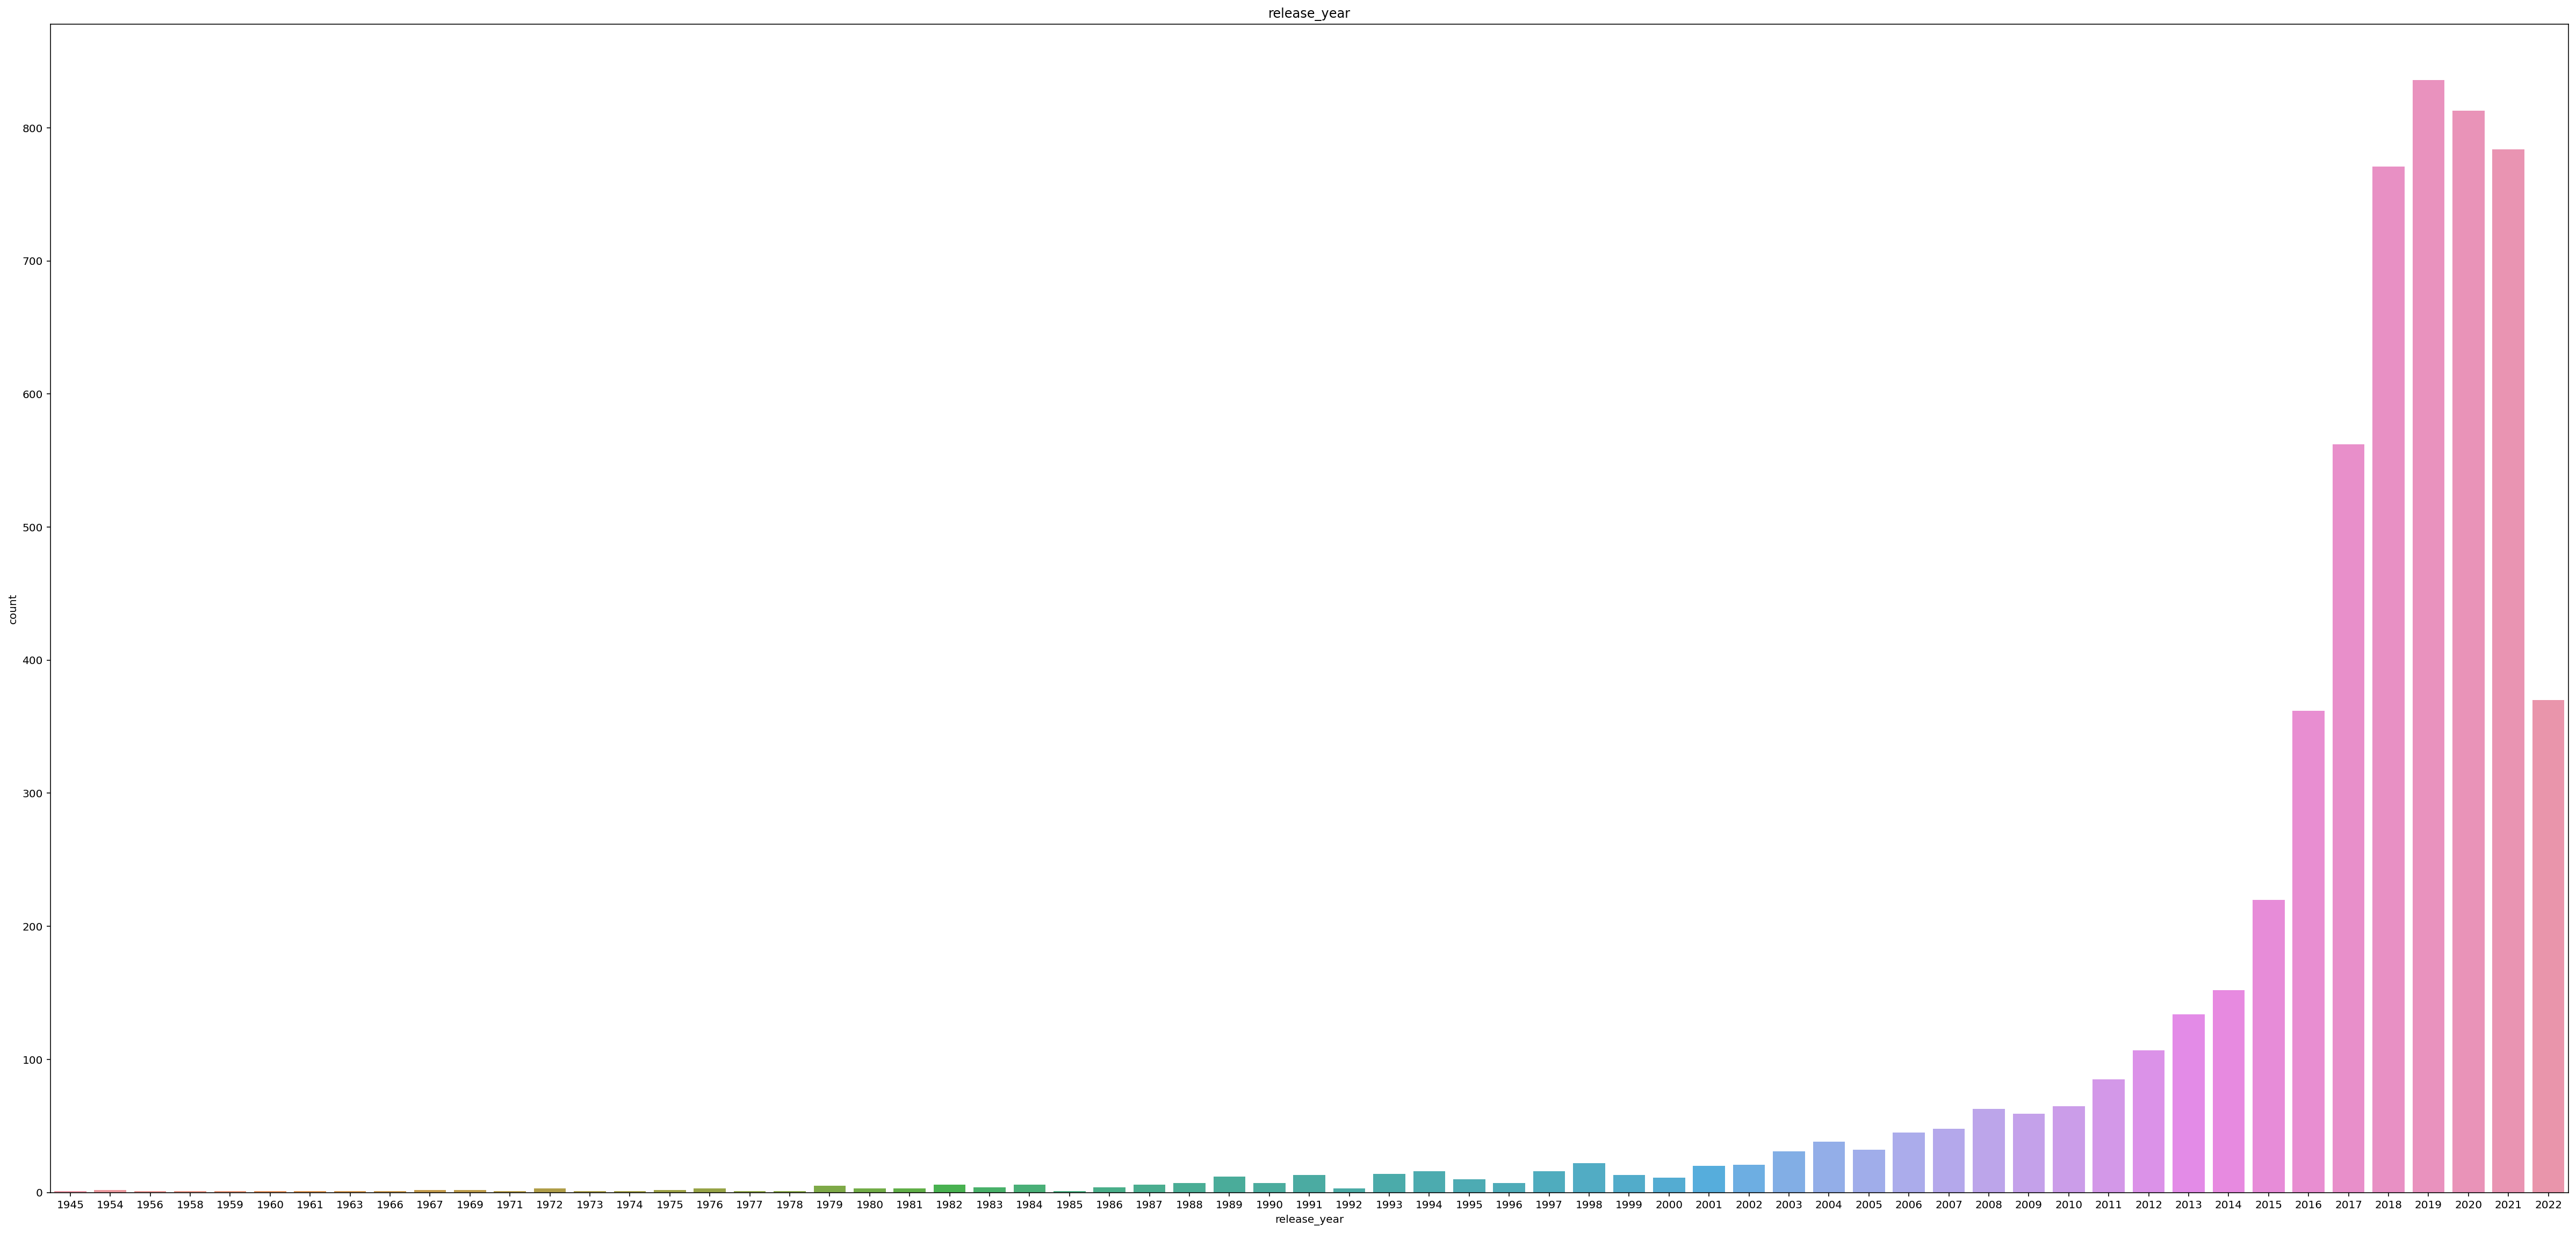

In [72]:
plt.figure(figsize=(42,20))

sns.countplot(data=title, x="release_year")
plt.title("release_year")
plt.show()

2019년이 최다 영화 출판

#### age_certification

In [73]:
list(set(title['age_certification']))

[nan,
 'TV-Y',
 'TV-G',
 'NC-17',
 'G',
 'TV-MA',
 'PG',
 'PG-13',
 'TV-Y7',
 'TV-PG',
 'R',
 'TV-14']

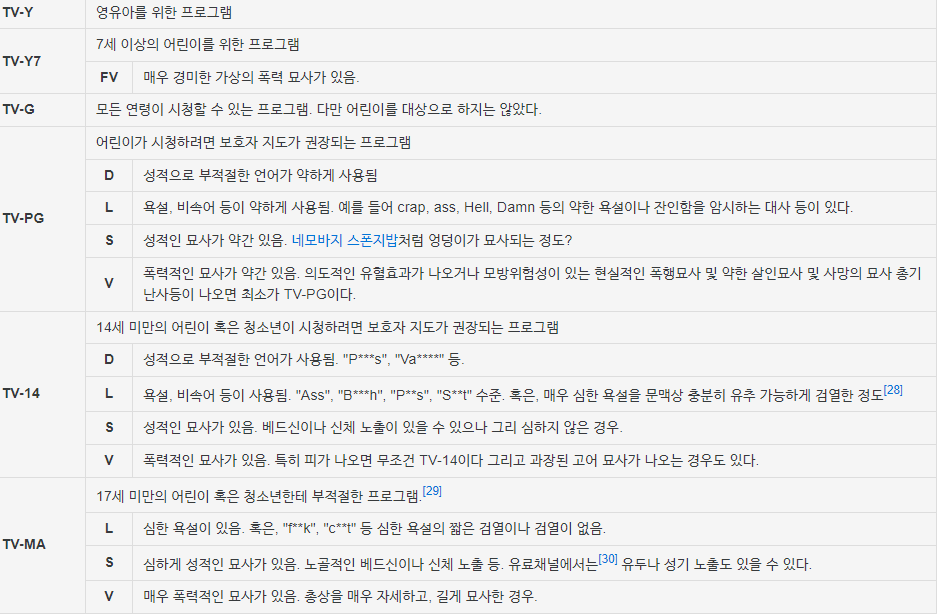
출처: 나무위키

In [74]:
title['age_certification'].value_counts()

TV-MA    883
R        556
TV-14    472
PG-13    451
PG       233
TV-PG    187
G        122
TV-Y7    120
TV-Y     107
TV-G      79
NC-17     16
Name: age_certification, dtype: int64

In [75]:
title['age_certification'].value_counts().sum()

3226

nan값

In [76]:
len(title['age_certification'])-title['age_certification'].value_counts().sum()

2608

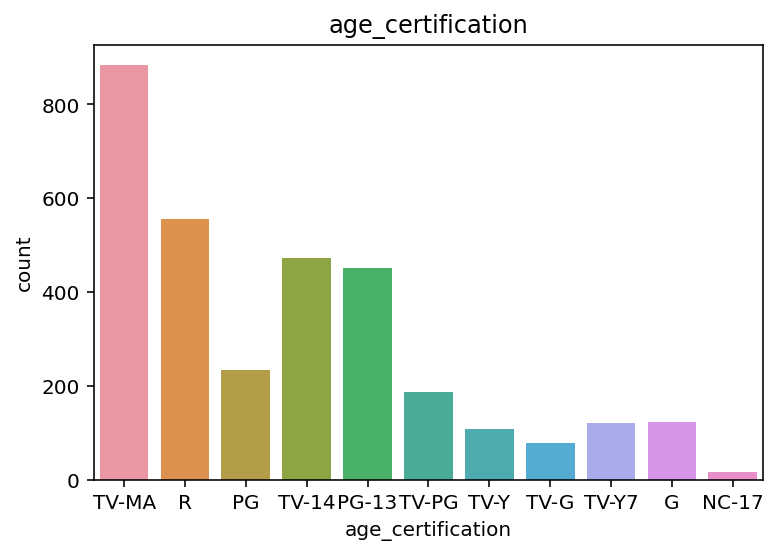

In [77]:

sns.countplot(data=title, x="age_certification")
plt.title("age_certification")
plt.show()

17세 미만 부적절 프로그램이 제일 다수

nan 값은 그냥 제한이 없는 프로그램이 아닐까..

#### 출판수가 많은 국가 수

In [78]:
country_count=title['production_countries'].value_counts()
country_count

['US']                1957
['IN']                 596
['JP']                 264
['KR']                 222
[]                     219
                      ... 
['IT', 'US', 'FR']       1
['US', 'KH']             1
['ZA', 'GB']             1
['CL', 'AR']             1
['ES', 'DK']             1
Name: production_countries, Length: 452, dtype: int64

nan 값 제외, 협력한 국가는 쉼표 기준으로 잘라서 하나씩 더해주는 형식

In [79]:
country=list(title['production_countries'])
country

["['US']",
 "['US']",
 "['US']",
 "['GB']",
 "['GB', 'US']",
 "['GB']",
 "['GB']",
 "['US']",
 "['US']",
 "['US']",
 "['GB', 'US']",
 "['US']",
 "['US']",
 "['US']",
 "['EG']",
 "['DE']",
 "['US']",
 "['EG']",
 "['EG']",
 "['IN']",
 "['EG']",
 "['SU', 'IN']",
 "['EG']",
 "['EG']",
 "['LB', 'CA', 'FR']",
 "['IN']",
 '[]',
 "['LB']",
 "['DZ', 'EG']",
 "['IN']",
 "['IN']",
 "['IN']",
 "['CA', 'FR', 'LB']",
 "['IN']",
 "['IN']",
 "['US']",
 "['US']",
 "['US', 'GB']",
 "['US', 'IT']",
 "['US']",
 "['GB', 'US']",
 "['US']",
 "['US']",
 "['US']",
 "['US']",
 "['GB']",
 "['US']",
 "['US']",
 "['US']",
 "['US']",
 "['US']",
 "['US']",
 "['US']",
 "['US']",
 "['US']",
 "['GB']",
 "['IN']",
 "['JP']",
 "['JP']",
 "['GB']",
 "['US']",
 "['AR']",
 "['US']",
 "['JP']",
 "['GB']",
 "['IN']",
 "['IN']",
 "['GB']",
 "['US']",
 "['US']",
 "['US']",
 "['IN']",
 "['US']",
 "['US']",
 "['US']",
 "['US']",
 "['IN']",
 "['IN']",
 "['FR', 'EG']",
 "['IN']",
 "['US']",
 "['IN']",
 "['US']",
 "['US']",
 "['IN']

In [ ]:
country_list=[]

for i in country:
    if (country[i] )

In [ ]:
country[4]

In [ ]:
sns.countplot( x=list(country_count))

plt.title("production_countries")
plt.show()

In [ ]:
title.corr()

In [ ]:
title['seasons'].unique()

In [ ]:
fig=px.bar(x=genres_imdb["genres"],
          y=genres_imdb["imdb_score"],

In [81]:
set(title['genres'])

{"['reality', 'romance', 'documentation', 'comedy']",
 "['documentation', 'european']",
 "['crime', 'comedy']",
 "['action', 'animation', 'fantasy']",
 "['drama', 'thriller', 'crime', 'comedy', 'european']",
 "['animation', 'comedy', 'family', 'fantasy', 'action', 'european']",
 "['scifi', 'action', 'comedy', 'crime', 'fantasy', 'thriller']",
 "['drama', 'comedy', 'european']",
 "['western', 'drama', 'action', 'european']",
 "['scifi', 'drama', 'fantasy', 'thriller']",
 "['crime', 'drama', 'thriller', 'european']",
 "['comedy', 'sport', 'european']",
 "['drama', 'animation', 'fantasy', 'thriller']",
 "['action', 'crime', 'comedy']",
 "['scifi', 'action', 'fantasy', 'comedy', 'drama', 'animation', 'family']",
 "['romance', 'crime', 'thriller', 'drama']",
 "['drama', 'animation', 'family', 'fantasy', 'thriller', 'european']",
 "['drama', 'documentation', 'crime']",
 "['history', 'music', 'romance', 'drama']",
 "['action', 'scifi', 'drama', 'animation', 'comedy', 'family', 'fantasy']",
 "